In [2]:
import pandas as pd


# read dataframes
df_AFD = pd.read_csv('complete_data/AFD_complete_eval5.csv')
df_CDU_CSU = pd.read_csv('complete_data/CDU-CSU_complete_eval5.csv')
df_GRUENEN = pd.read_csv('complete_data/DIE_GRUENEN_complete_eval5.csv')
df_LINKE = pd.read_csv('complete_data/DIE_LINKE_complete_eval5.csv')
df_FDP = pd.read_csv('complete_data/FDP_complete_eval5.csv')
df_SPD = pd.read_csv('complete_data/SPD_complete_eval5.csv')

In [194]:
bartlargemnli = ['newmods\AFD_Wahlprogramm_2021_topicpred_bart-large-mnli.csv',
'newmods\CDU-CSU_Wahlrprogramm_2021_topicpred_bart-large-mnli.csv',
'newmods\DIE_GRUENEN_Wahlprogramm_2021_topicpred_bart-large-mnli.csv',
'newmods\DIE_LINKE_Wahlprogramm_2021_topicpred_bart-large-mnli.csv',
'newmods\FDP_Wahlprogramm_2021_topicpred_bart-large-mnli.csv',
'newmods\SPD_Wahlprogramm_2021_topicpred_bart-large-mnli.csv']


mDeBERTav3basemnlixnli = ['newmods\AFD_Wahlprogramm_2021_topicpred_mDeBERTa-v3-base-mnli-xnli.csv'
, 'newmods\CDU-CSU_Wahlrprogramm_2021_topicpred_mDeBERTa-v3-base-mnli-xnli.csv'
, 'newmods\DIE_GRUENEN_Wahlprogramm_2021_topicpred_mDeBERTa-v3-base-mnli-xnli.csv'
, 'newmods\DIE_LINKE_Wahlprogramm_2021_topicpred_mDeBERTa-v3-base-mnli-xnli.csv'
, 'newmods\FDP_Wahlprogramm_2021_topicpred_mDeBERTa-v3-base-mnli-xnli.csv'
, 'newmods\SPD_Wahlprogramm_2021_topicpred_mDeBERTa-v3-base-mnli-xnli.csv'
]

xlmrobertalargexnli = ['newmods\AFD_Wahlprogramm_2021_topicpred_xlm-roberta-large-xnli.csv',
'newmods\CDU-CSU_Wahlrprogramm_2021_topicpred_xlm-roberta-large-xnli.csv',
'newmods\DIE_GRUENEN_Wahlprogramm_2021_topicpred_xlm-roberta-large-xnli.csv',
'newmods\DIE_LINKE_Wahlprogramm_2021_topicpred_xlm-roberta-large-xnli.csv',
'newmods\FDP_Wahlprogramm_2021_topicpred_xlm-roberta-large-xnli.csv',
'newmods\SPD_Wahlprogramm_2021_topicpred_xlm-roberta-large-xnli.csv'
]

In [ ]:
DeBERT_df = pd.DataFrame()

for i in mDeBERTav3basemnlixnli:
    DeBERT_df = DeBERT_df.append(pd.read_csv(i, sep="§",index_col= "Unnamed: 0"))
DeBERT_df = DeBERT_df.reset_index(drop = True)
DeBERT_df= DeBERT_df.rename(columns={"labels":"DeBert_label"})

xlmroberta = pd.DataFrame()

for i in xlmrobertalargexnli:
    xlmroberta = xlmroberta.append(pd.read_csv(i, sep="§",index_col= "Unnamed: 0"))
xlmroberta = xlmroberta.reset_index(drop = True)
xlmroberta= xlmroberta.rename(columns={"labels":"xlmroberta_label"})

bartlarge = pd.DataFrame()

for i in bartlargemnli:
    bartlarge = bartlarge.append(pd.read_csv(i, sep="§",index_col= "Unnamed: 0"))
bartlarge = bartlarge.reset_index(drop = True)
bartlarge= bartlarge.rename(columns={"labels":"bertlarge_label"})


In [ ]:
selfannot_df = pd.DataFrame()
selfannot_df = selfannot_df.append(pd.read_csv('rückmeldungen_data2/sample_df_DIE_GRUENEN2.csv', sep = ';'))
selfannot_df = selfannot_df.append(pd.read_csv('rückmeldungen_data2/sample_df_CDU-CSU2.csv', sep = ';'))
selfannot_df = selfannot_df.append(pd.read_csv('rückmeldungen_data2/sample_df_SPD2.csv', sep = ';'))
selfannot_df = selfannot_df.append(pd.read_csv('rückmeldungen_data2/sample_df_DIE_LINKE2.csv', sep = ';'))
selfannot_df = selfannot_df.append(pd.read_csv('rückmeldungen_data2/sample_df_AFD2.csv', sep = ';'))
selfannot_df = selfannot_df.append(pd.read_csv('rückmeldungen_data2/sample_df_FDP2.csv', sep = ';'))

In [245]:
selfannot_df= selfannot_df.drop(axis = 1, columns = ['scores', 'Top 3', 'Unnamed: 11',
       'Unnamed: 12','text', 'sentiment_label', 'score', 'sentence', 'hate_label',
       'hate_score','labels'])

In [246]:
selfannot_df["topic"]= selfannot_df["topic"].str.lower()
#selfannot_df = selfannot_df.rename(columns={"topic":"y_true"})

In [247]:
acc_df_DeBERT = pd.merge(selfannot_df, DeBERT_df, left_on='sequence', right_on='sequence', how='left').drop_duplicates()
acc_df_xlmroberta = pd.merge(selfannot_df, xlmroberta, left_on='sequence', right_on='sequence', how='left').drop_duplicates()
acc_df_bartlarge = pd.merge(selfannot_df, bartlarge, left_on='sequence', right_on='sequence', how='left').drop_duplicates()

In [ ]:
acc_df_xlmroberta

In [249]:
from sklearn.metrics import accuracy_score
print(f"Acc von mDeBERTa-v3-base-mnli-xnli ist {round(accuracy_score(acc_df_DeBERT['topic'], acc_df_DeBERT['DeBert_label'])*100,2)}%")
print(f"Acc von xlm-roberta-large-xnli ist {round(accuracy_score(acc_df_xlmroberta['topic'], acc_df_xlmroberta['xlmroberta_label'])*100,2)}%")
print(f"Acc von bart-large-mnli ist {round(accuracy_score(acc_df_bartlarge['topic'], acc_df_bartlarge['bertlarge_label'])*100,2)}%")

Acc von mDeBERTa-v3-base-mnli-xnli ist 46.48%
Acc von xlm-roberta-large-xnli ist 34.51%
Acc von bart-large-mnli ist 32.39%


In [3]:
sample_df_AFD = df_AFD.groupby('topic').sample(n=3, random_state=1)
sample_df_CDU_CSU = df_CDU_CSU.groupby('topic').sample(n=3, random_state=2)
sample_df_GRUENEN = df_GRUENEN.groupby('topic').sample(n=3, random_state=3)
sample_df_LINKE = df_LINKE.groupby('topic').sample(n=3, random_state=4)
sample_df_FDP = df_FDP.groupby('topic').sample(n=3, random_state=5)
sample_df_SPD = df_SPD.groupby('topic').sample(n=3, random_state=6)

In [ ]:
sample_df_GRUENEN

In [ ]:

#display dataframes 
dataframes = [sample_df_AFD, sample_df_CDU_CSU, sample_df_GRUENEN, sample_df_LINKE, sample_df_FDP, sample_df_SPD]
for i in dataframes: 
    display(i)

In [4]:
sample_df_AFD.to_csv('sample_df_AFD2.csv', index = False)
sample_df_CDU_CSU.to_csv('sample_df_CDU-CSU2.csv', index = False)
sample_df_GRUENEN.to_csv('sample_df_DIE_GRUENEN2.csv', index = False)
sample_df_LINKE.to_csv('sample_df_DIE_LINKE2.csv', index = False)
sample_df_FDP.to_csv('sample_df_FDP2.csv', index = False)
sample_df_SPD.to_csv('sample_df_SPD2.csv', index = False)


In [5]:
df_GRUENEN_rueck = pd.read_csv('rückmeldungen_data2/sample_df_DIE_GRUENEN2.csv', sep = ';')
df_CDU_CSU_rueck = pd.read_csv('rückmeldungen_data2/sample_df_CDU-CSU2.csv', sep = ';')
df_SPD_rueck = pd.read_csv('rückmeldungen_data2/sample_df_SPD2.csv', sep = ';')
df_Linke_rueck = pd.read_csv('rückmeldungen_data2/sample_df_DIE_LINKE2.csv', sep = ';')
df_AFD_rueck = pd.read_csv('rückmeldungen_data2/sample_df_AFD2.csv', sep = ';')
df_FDP_rueck = pd.read_csv('rückmeldungen_data2/sample_df_FDP2.csv', sep = ';')


In [6]:
df_GRUENEN_rueck_merged = pd.merge(sample_df_GRUENEN, df_GRUENEN_rueck, on=['text'], how='inner') 
df_CDU_CSU_rueck_merged = pd.merge(sample_df_CDU_CSU, df_CDU_CSU_rueck, on=['text'], how='inner') 
df_SPD_rueck_merged = pd.merge(sample_df_SPD, df_SPD_rueck, on=['text'], how='inner') 
df_LINKE_rueck_merged = pd.merge(sample_df_LINKE, df_Linke_rueck, on=['text'], how='inner') 
df_AFD_rueck_merged = pd.merge(sample_df_AFD, df_AFD_rueck, on=['text'], how='inner') 
df_FDP_rueck_merged = pd.merge(sample_df_FDP, df_FDP_rueck, on=['text'], how='inner') 

In [36]:
correctly_classified_topic = []
wrongly_classified_topic = []
correctly_classified_label = []
wrongly_classified_label = []
correctly_classified_hatelabel = []
wrongly_classified_hataelabel = []
correctly_classified_topiclabels = []
wrongly_classified_topiclabels = []


In [37]:
for index, row in df_GRUENEN_rueck_merged.iterrows():
    if row['topic_x'] == row['topic_y']:
        correctly_classified_topic.append([row['topic_x'], row['topic_y']])
    if not row['topic_x'] == row['topic_y']:
        wrongly_classified_topic.append([row['topic_x'], row['topic_y']])
    if row['sentiment_label_x'] == row['sentiment_label_y']:
        correctly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if not row['sentiment_label_x'] == row['sentiment_label_y']:
        wrongly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if row['hate_label_x'] == row['hate_label_y']:
        correctly_classified_hatelabel.append([row['hate_label_x'], row['hate_label_y']])
    if not row['hate_label_x'] == row['hate_label_y']:
         wrongly_classified_hataelabel.append([row['hate_label_x'], row['hate_label_y']])
    if row['labels_x'] == row['labels_y']:
        correctly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
    if not row['labels_x'] == row['labels_y']:
        wrongly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
              

In [38]:
for index, row in df_CDU_CSU_rueck_merged.iterrows():
    if row['topic_x'] == row['topic_y']:
        correctly_classified_topic.append([row['topic_x'], row['topic_y']])
    if not row['topic_x'] == row['topic_y']:
        wrongly_classified_topic.append([row['topic_x'], row['topic_y']])
    if row['sentiment_label_x'] == row['sentiment_label_y']:
        correctly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if not row['sentiment_label_x'] == row['sentiment_label_y']:
        wrongly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if row['hate_label_x'] == row['hate_label_y']:
        correctly_classified_hatelabel.append([row['hate_label_x'], row['hate_label_y']])
    if not row['hate_label_x'] == row['hate_label_y']:
         wrongly_classified_hataelabel.append([row['hate_label_x'], row['hate_label_y']])
    if row['labels_x'] == row['labels_y']:
        correctly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
    if not row['labels_x'] == row['labels_y']:
        wrongly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
              

In [39]:
for index, row in df_SPD_rueck_merged.iterrows():
    if row['topic_x'] == row['topic_y']:
        correctly_classified_topic.append([row['topic_x'], row['topic_y']])
    if not row['topic_x'] == row['topic_y']:
        wrongly_classified_topic.append([row['topic_x'], row['topic_y']])
    if row['sentiment_label_x'] == row['sentiment_label_y']:
        correctly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if not row['sentiment_label_x'] == row['sentiment_label_y']:
        wrongly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if row['hate_label_x'] == row['hate_label_y']:
        correctly_classified_hatelabel.append([row['hate_label_x'], row['hate_label_y']])
    if not row['hate_label_x'] == row['hate_label_y']:
         wrongly_classified_hataelabel.append([row['hate_label_x'], row['hate_label_y']])
    if row['labels_x'] == row['labels_y']:
        correctly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
    if not row['labels_x'] == row['labels_y']:
        wrongly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
              

In [40]:
for index, row in df_LINKE_rueck_merged.iterrows():
    if row['topic_x'] == row['topic_y']:
        correctly_classified_topic.append([row['topic_x'], row['topic_y']])
    if not row['topic_x'] == row['topic_y']:
        wrongly_classified_topic.append([row['topic_x'], row['topic_y']])
    if row['sentiment_label_x'] == row['sentiment_label_y']:
        correctly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if not row['sentiment_label_x'] == row['sentiment_label_y']:
        wrongly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if row['hate_label_x'] == row['hate_label_y']:
        correctly_classified_hatelabel.append([row['hate_label_x'], row['hate_label_y']])
    if not row['hate_label_x'] == row['hate_label_y']:
         wrongly_classified_hataelabel.append([row['hate_label_x'], row['hate_label_y']])
    if row['labels_x'] == row['labels_y']:
        correctly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
    if not row['labels_x'] == row['labels_y']:
        wrongly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
              

In [41]:
for index, row in df_AFD_rueck_merged.iterrows():
    if row['topic_x'] == row['topic_y']:
        correctly_classified_topic.append([row['topic_x'], row['topic_y']])
    if not row['topic_x'] == row['topic_y']:
        wrongly_classified_topic.append([row['topic_x'], row['topic_y']])
    if row['sentiment_label_x'] == row['sentiment_label_y']:
        correctly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if not row['sentiment_label_x'] == row['sentiment_label_y']:
        wrongly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if row['hate_label_x'] == row['hate_label_y']:
        correctly_classified_hatelabel.append([row['hate_label_x'], row['hate_label_y']])
    if not row['hate_label_x'] == row['hate_label_y']:
         wrongly_classified_hataelabel.append([row['hate_label_x'], row['hate_label_y']])
    if row['labels_x'] == row['labels_y']:
        correctly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
    if not row['labels_x'] == row['labels_y']:
        wrongly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
              

In [42]:
for index, row in df_FDP_rueck_merged.iterrows():
    if row['topic_x'] == row['topic_y']:
        correctly_classified_topic.append([row['topic_x'], row['topic_y']])
    if not row['topic_x'] == row['topic_y']:
        wrongly_classified_topic.append([row['topic_x'], row['topic_y']])
    if row['sentiment_label_x'] == row['sentiment_label_y']:
        correctly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if not row['sentiment_label_x'] == row['sentiment_label_y']:
        wrongly_classified_label.append([row['sentiment_label_x'], row['sentiment_label_y']])
    if row['hate_label_x'] == row['hate_label_y']:
        correctly_classified_hatelabel.append([row['hate_label_x'], row['hate_label_y']])
    if not row['hate_label_x'] == row['hate_label_y']:
         wrongly_classified_hataelabel.append([row['hate_label_x'], row['hate_label_y']])
    if row['labels_x'] == row['labels_y']:
        correctly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
    if not row['labels_x'] == row['labels_y']:
        wrongly_classified_topiclabels.append([row['labels_x'], row['labels_y']])
              

In [ ]:
print(correctly_classified_topic)
print(len(correctly_classified_topic))
print(correctly_classified_label)
print(len(correctly_classified_label))
print(correctly_classified_hatelabel)
print(len(correctly_classified_hatelabel))
print(correctly_classified_topiclabels)
print(len(correctly_classified_topiclabels))

In [ ]:
wrongly_classified_topic


result topic 57.34265734265735 %
result sentiment_label 69.23076923076923 %
result hate_label 100.0 %
result topic_labels 27.27272727272727 %


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [ ]:
df_accuracy

In [ ]:
df_accuracy = df_CDU_CSU_rueck_merged
df_accuracy = df_accuracy.append(df_AFD_rueck_merged)
df_accuracy = df_accuracy.append(df_FDP_rueck_merged)
df_accuracy = df_accuracy.append(df_GRUENEN_rueck_merged)
df_accuracy = df_accuracy.append(df_SPD_rueck_merged)
df_accuracy = df_accuracy.append(df_LINKE_rueck_merged)




In [237]:

df_accuracy_final1 = pd.merge(df_accuracy, acc_df_DeBERT, left_on='sequence_x', right_on='sequence', how='left')
df_accuracy_final1 = df_accuracy_final1.loc[:, ~df_accuracy_final1.columns.duplicated()]
df_accuracy_final2 = pd.merge(df_accuracy_final1, acc_df_xlmroberta, left_on='sequence_x', right_on='sequence', how='left')
df_accuracy_final2 = df_accuracy_final2.loc[:, ~df_accuracy_final2.columns.duplicated()]
df_accuracy_final3 = pd.merge(df_accuracy_final2, acc_df_bartlarge, left_on='sequence_x', right_on='sequence', how='left')

C:\Users\DELSTEI9\AppData\Local\Temp\ipykernel_17012\2088716899.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'scores_x', 'labels_x', 'Top 3_x', 'sequence_x', 'topic_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_accuracy_final2 = pd.merge(df_accuracy_final1, acc_df_xlmroberta, left_on='sequence_x', right_on='sequence', how='left')


In [ ]:
df_accuracy_final3

In [262]:
acc_df_DeBERT = pd.merge(selfannot_df, DeBERT_df, left_on='sequence', right_on='sequence', how='left').drop_duplicates()
acc_df_xlmroberta = pd.merge(selfannot_df, xlmroberta, left_on='sequence', right_on='sequence', how='left').drop_duplicates()
acc_df_bartlarge = pd.merge(selfannot_df, bartlarge, left_on='sequence', right_on='sequence', how='left').drop_duplicates()

In [133]:
df_accuracy['hate_label_y']

0     neutral
1     neutral
2     neutral
3     neutral
4     neutral
       ...   
19    neutral
20    neutral
21    neutral
22    neutral
23    neutral
Name: hate_label_y, Length: 143, dtype: object

In [268]:
# Calc Prozent

result_topic = 100* (((len(correctly_classified_topic)) / 143 ))
result_sentiment_label =  100* (((len(correctly_classified_label)) / 143 ))
result_hatelabel =  100* (((len(correctly_classified_hatelabel)) / 143 ))
result_topiclabels =  100* (((len(correctly_classified_topiclabels)) / 143 ))

print(f'result topic {result_topic} %')
print(f'result sentiment_label {result_sentiment_label} %')
print(f'result hate_label {result_hatelabel} %')
print(f'result topic_labels {result_topiclabels} %')


result topic 56.64335664335665 %
result sentiment_label 69.23076923076923 %
result hate_label 100.0 %
result topic_labels 27.27272727272727 %


In [ ]:
result_topic = accuracy_score(df_accuracy['topic_x'], df_accuracy['topic_y'])
result_sentiment = accuracy_score(df_accuracy['sentiment_label_x'], df_accuracy['sentiment_label_y'])
result_hate_label = accuracy_score(df_accuracy['hate_label_x'], df_accuracy['hate_label_y'])
result_topic_labels = accuracy_score(df_accuracy['labels_x'], df_accuracy['labels_y'])

In [157]:
print(f'Accuracy Score Spacy Topics: {round(result_topic * 100,3)} %')
print(f'Accuracy Score Sentiment_label: {round(result_sentiment * 100,3)} %')
print(f'Accuracy Score Hates_label: {round(result_hate_label * 100,3)} %')
print(f'Accuracy Score Valhalla Topic: {round(result_topic_labels* 100,3)} %')

Accuracy Score Spacy Topics: 56.643 %
Accuracy Score Sentiment_label: 69.231 %
Accuracy Score Hates_label: 100.0 %
Accuracy Score Valhalla Topic: 27.273 %


In [272]:
matrix_topic1 = confusion_matrix(acc_df_DeBERT['topic'], acc_df_DeBERT['DeBert_label'], labels = ['bildung', 'infrastruktur', 'soziale ursachen', 'wirtschaft', 'klima', 'politik und ideologie', 'wissenschaft', 'gesundheit'])

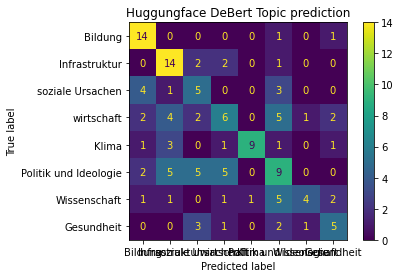

In [273]:
disp = ConfusionMatrixDisplay(matrix_topic1, display_labels=['Bildung', 'Infrastruktur', 'soziale Ursachen', 'wirtschaft', 'Klima', 'Politik und Ideologie', 'Wissenschaft', 'Gesundheit'])

disp.plot()
plt.title('Huggungface DeBert Topic prediction')
plt.show()

In [274]:
matrix_topic2 = confusion_matrix(df_accuracy['topic_y'], df_accuracy['topic_x'], labels = ['Bildung', 'Infrastruktur', 'soziale Ursachen', 'wirtschaft', 'Klima', 'Politik und Ideologie', 'Wissenschaft', 'Gesundheit'])


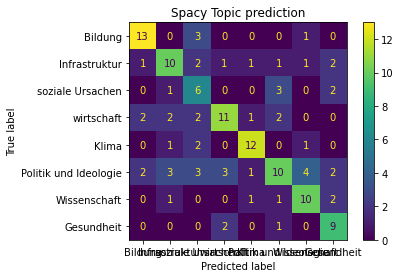

In [275]:
disp = ConfusionMatrixDisplay(matrix_topic2, display_labels=['Bildung', 'Infrastruktur', 'soziale Ursachen', 'wirtschaft', 'Klima', 'Politik und Ideologie', 'Wissenschaft', 'Gesundheit'])

disp.plot()
plt.title('Spacy Topic prediction')
plt.show()

In [137]:
import numpy as np
df_accuracy['new_topic'] = np.where(df_accuracy['topic_x'] == df_accuracy['topic_y'], 'True', 'False')
df_accuracy['new_sentiment'] = np.where(df_accuracy['sentiment_label_x'] == df_accuracy['sentiment_label_y'], 'True', 'False')
df_accuracy['new_hate'] = np.where(df_accuracy['hate_label_x'] == df_accuracy['hate_label_y'], 'True', 'False')
df_accuracy['new_topiclabels'] = np.where(df_accuracy['labels_x'] == df_accuracy['labels_y'], 'True', 'False')


In [140]:
df_accuracy['hate_label_y']

0     neutral
1     neutral
2     neutral
3     neutral
4     neutral
       ...   
19    neutral
20    neutral
21    neutral
22    neutral
23    neutral
Name: hate_label_y, Length: 143, dtype: object

In [150]:
a = df_accuracy[df_accuracy['new_topic'] == 'False']['topic_y']
print(1)
b = df_accuracy[df_accuracy['new_sentiment'] == 'False']['sentiment_label_y'].value_counts()
print(1)
c = df_accuracy[df_accuracy['new_hate'] == 'False']['hate_label_y'].value_counts()
print(1)
d = df_accuracy[df_accuracy['new_topiclabels'] == 'False']['labels_y'].value_counts()
print(1)

1
1
1
1


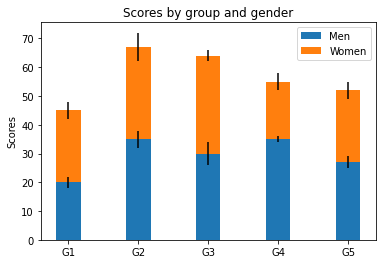

In [142]:
import matplotlib.pyplot as plt


labels = ['Politik und Ideologie', 'Infrastruktur', 'wirtschaft', 'Wissenschaft', 'Klima', 'Gesundheit', 'soziale Ursachen', 'Bildung']
falsch_klassifiziert = [a[0], a[1], a[2], a[4], a[5], a[7], a[3], a[6]]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, falsch_klassifiziert, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()